In [18]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
plt.style.use('ggplot')
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="statsmodels", message="The pandas.core.datetools module is deprecated")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



train = pd.read_csv("../Machine-Learning-Project/train.csv")
test = pd.read_csv("../Machine-Learning-Project/test.csv")

In [19]:
htrain = train.copy()
htest = test.copy()
htrain.head()
print(htrain.shape)

(1460, 81)


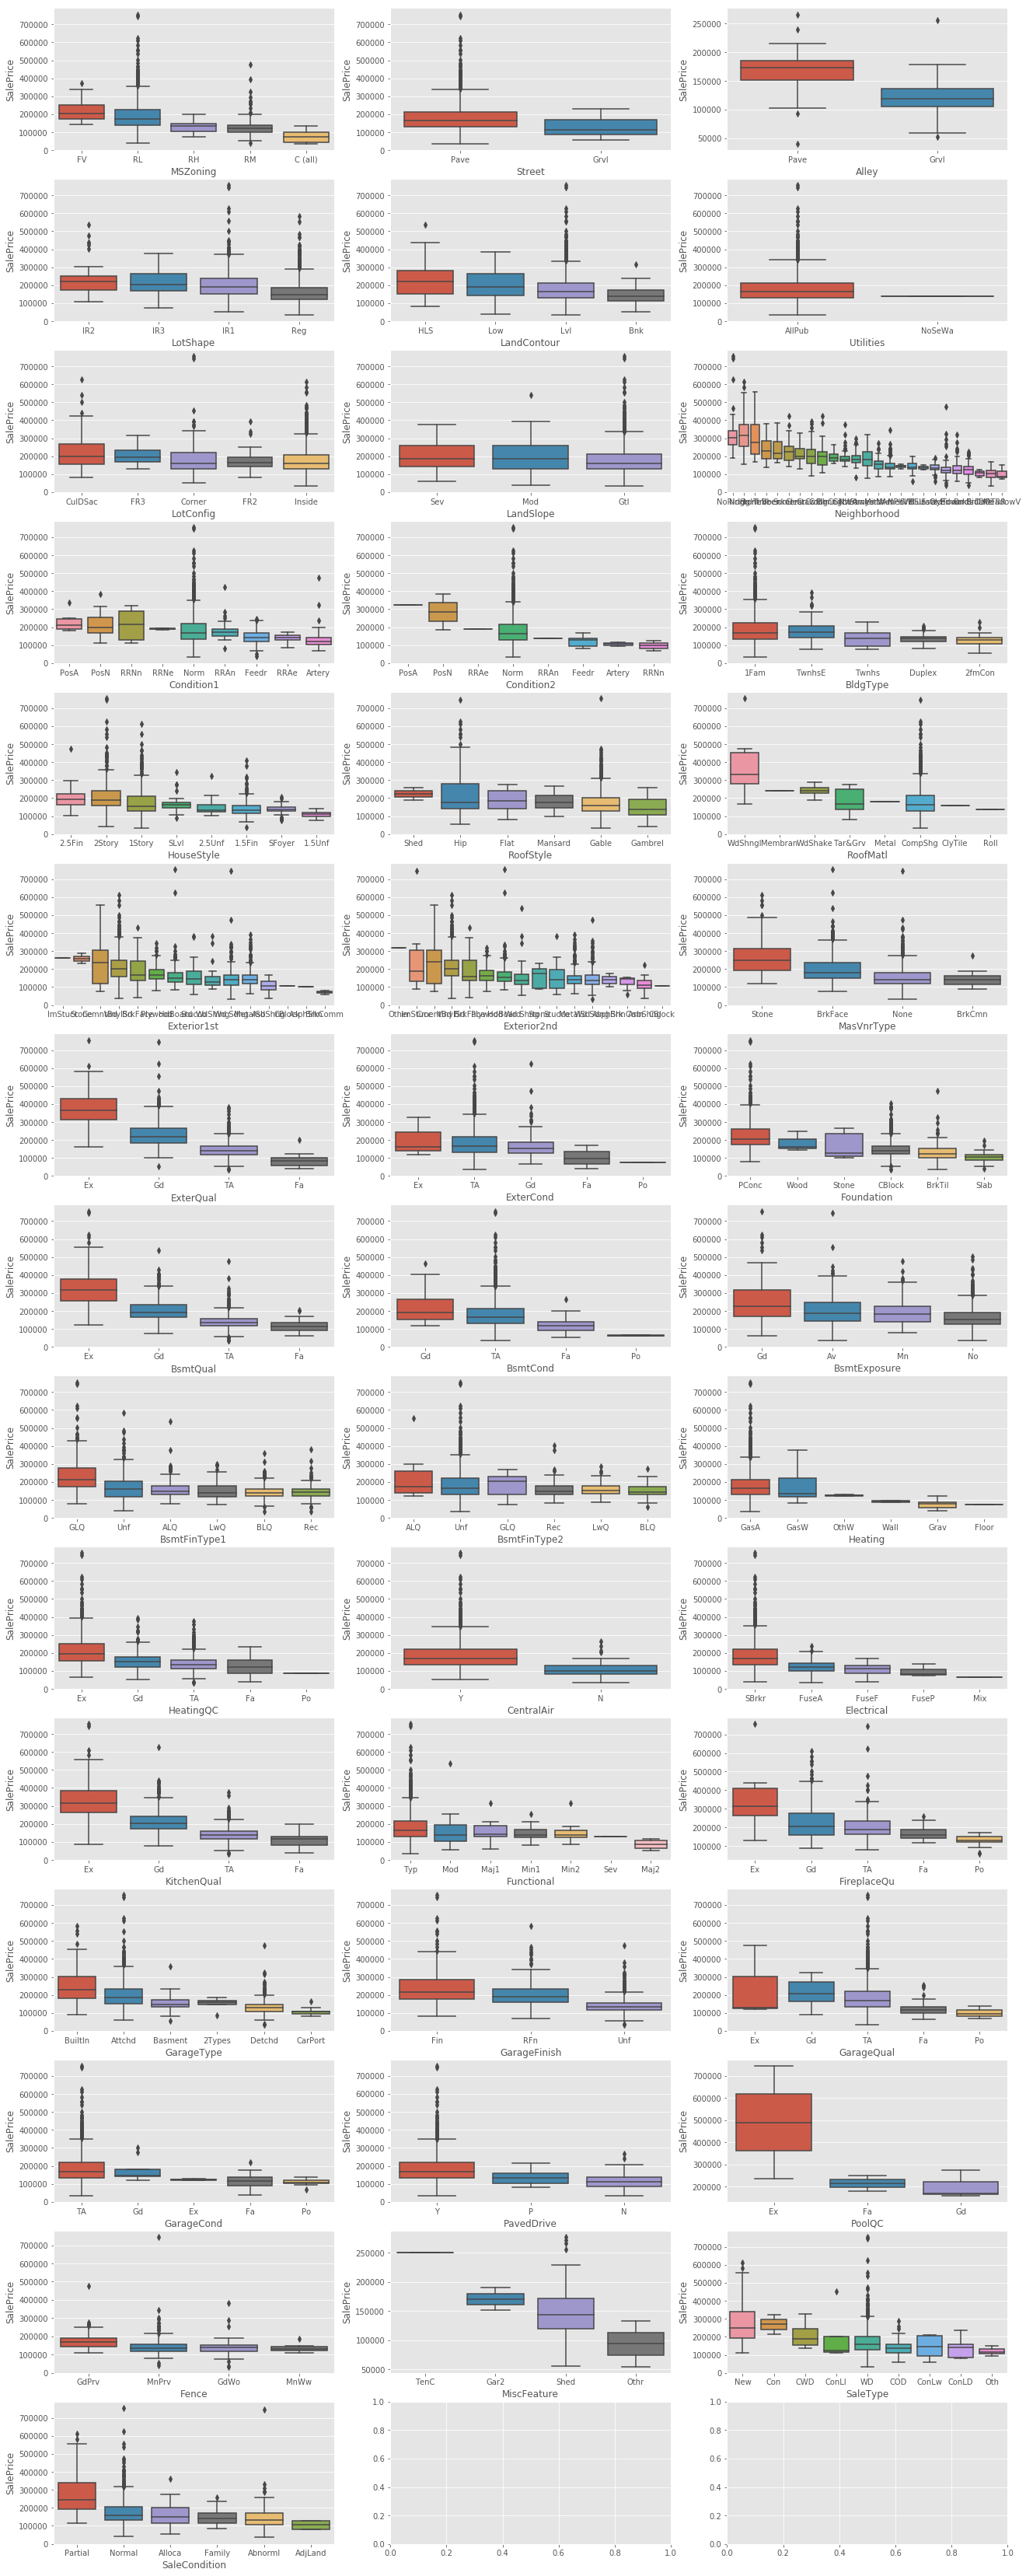

In [20]:
obj_cols = htrain.select_dtypes(include = "object")

fig, axes = plt.subplots(ncols=3, nrows= 15,figsize=(22,60))

for i, c in enumerate(obj_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    order = htrain.groupby(c)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=htrain[c], y=htrain['SalePrice'], ax = ax_curr, order=order)
plt.show()


In [21]:
print(htrain.shape)

(1460, 81)


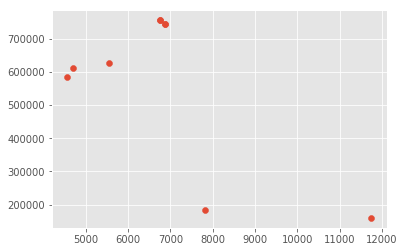

9


In [22]:
from scipy import stats
#examinig outliers by computing abs value of zscore and more than 4 sd from mean w/ TotalSq
#add total square footage feature
htrain = htrain.assign(totalsq = htrain['GrLivArea'] + htrain['TotalBsmtSF'])
htest = htest.assign(totalsq = htest['GrLivArea'] + htest['TotalBsmtSF'])

z_score = np.abs(stats.zscore(htrain[["totalsq", "SalePrice"]]))
outliers = htrain[z_score >  5]
plt.scatter(x=outliers.totalsq, y = outliers.SalePrice)
plt.show()
print(len(outliers))
#there are outliers and they are from homes above 4000

In [24]:
htrain.drop(outliers.index, inplace = True)
htrain.shape

ValueError: labels [ 523  691  691  803  898 1169 1182 1182 1298] not contained in axis

In [25]:
# # #dataset with the outliers removed



In [26]:
ntrain = htrain.shape[0]
ntest = htest.shape[0]
y_train = htrain.SalePrice.values
all_data = pd.concat((htrain, htest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data.head()

all_data size is : (2912, 81)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,totalsq
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,2566.0
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,2524.0
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,2706.0
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,2473.0
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,3343.0


In [27]:
print(ntrain)
print(ntest)


1453
1459


## Handling Missing Values

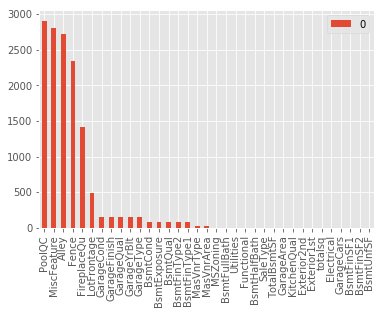

In [28]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].plot(kind = 'bar')


Fill in values in columns where missing means that feature is not present:

In [29]:
col_missings = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
"BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish","GarageQual",
"GarageCond", "PoolQC", "Fence","MiscFeature"]
all_data[col_missings] = all_data[col_missings].fillna(value = "None")

Check how many missing values are left:

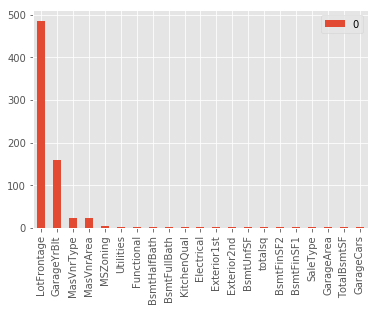

In [30]:
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].plot(kind = 'bar')

In [31]:
#all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [32]:
from fancyimpute import KNN
#all_data = pd.DataFrame(KNN(k=10).complete(all_data)).as_matrix()
all_data[['LotFrontage','MasVnrArea']] = pd.DataFrame(KNN(k=30).complete(all_data[['LotFrontage','MasVnrArea']])).as_matrix()

Imputing row 1/2912 with 0 missing, elapsed time: 0.947
Imputing row 101/2912 with 1 missing, elapsed time: 0.947
Imputing row 201/2912 with 0 missing, elapsed time: 0.947
Imputing row 301/2912 with 0 missing, elapsed time: 0.947
Imputing row 401/2912 with 0 missing, elapsed time: 0.947
Imputing row 501/2912 with 0 missing, elapsed time: 0.947
Imputing row 601/2912 with 0 missing, elapsed time: 0.947
Imputing row 701/2912 with 0 missing, elapsed time: 0.947
Imputing row 801/2912 with 0 missing, elapsed time: 0.963
Imputing row 901/2912 with 1 missing, elapsed time: 0.963
Imputing row 1001/2912 with 0 missing, elapsed time: 0.963
Imputing row 1101/2912 with 0 missing, elapsed time: 0.963
Imputing row 1201/2912 with 1 missing, elapsed time: 0.963
Imputing row 1301/2912 with 0 missing, elapsed time: 0.963
Imputing row 1401/2912 with 1 missing, elapsed time: 0.963
Imputing row 1501/2912 with 1 missing, elapsed time: 0.963
Imputing row 1601/2912 with 0 missing, elapsed time: 0.963
Imputing 

In [33]:
# dum2 = all_data.copy()
# dum2[['LotFrontage']] = pd.DataFrame(KNN(k=54).complete(dum2[['LotFrontage']])).as_matrix()

Total Missing Data: 207
Missing number of rows: 193


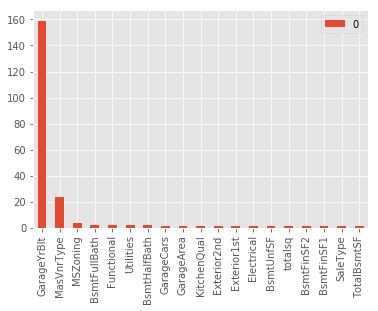

In [34]:
#looking at missing values in data 

missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))

print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))


plot_data=all_data[pd.isnull(all_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')

In [35]:
#plot_data.isnull().sum(axis=1)
lot_neighborhood = all_data["LotFrontage"].groupby(all_data["Neighborhood"])
all_data["LotFrontage"] = all_data["LotFrontage"]   
for key, group in lot_neighborhood:
    idx = (all_data["Neighborhood"] == key) & (all_data["LotFrontage"].isnull())
    all_data.loc[idx, "LotFrontage"] = group.median()   

In [36]:
all_data[all_data['PoolArea'] > 0 & all_data['PoolQC'].isnull()]


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,totalsq
197,1360,1360,0,None,4,1Fam,TA,No,1036.0,184.0,...,0,Pave,8,1360.0,AllPub,0,1918,1990,2006,4472.0
807,1309,0,0,None,3,1Fam,TA,No,663.0,377.0,...,0,Pave,5,1040.0,AllPub,265,1974,1999,2006,2349.0
1165,1118,0,0,None,3,1Fam,TA,Av,522.0,0.0,...,0,Pave,6,1096.0,AllPub,203,1977,1977,2008,2214.0
1379,1392,1392,0,None,5,1Fam,TA,No,790.0,469.0,...,440,Pave,12,1392.0,AllPub,0,1978,1978,2006,4176.0
1416,1575,626,0,None,4,1Fam,TA,Av,0.0,0.0,...,0,Pave,8,697.0,AllPub,586,1966,1966,2006,2898.0
1967,2470,0,0,None,1,1Fam,TA,Gd,2257.0,0.0,...,216,Pave,7,2535.0,AllPub,154,2003,2003,2008,5005.0
2413,1647,0,0,None,3,1Fam,TA,No,595.0,354.0,...,0,Pave,6,1105.0,AllPub,225,1953,1953,2007,2752.0
2496,1105,717,0,None,4,1Fam,TA,No,0.0,0.0,...,0,Pave,7,1105.0,AllPub,0,1984,1984,2007,2927.0
2566,2726,0,0,None,2,1Fam,TA,No,0.0,0.0,...,0,Pave,6,279.0,AllPub,216,1986,1986,2007,3005.0
2592,2034,0,0,None,2,1Fam,None,None,0.0,0.0,...,0,Pave,9,0.0,AllPub,483,1953,1953,2007,2034.0


In [37]:
#all_data["Functional"].fillna(train['Functional'].mode()[0], inplace=True)
all_data["GarageCars"].fillna(train["GarageCars"].mean(), inplace=True)
all_data["GarageArea"].fillna(train["GarageArea"].mean(), inplace=True)
all_data['Utilities'].fillna(train['Utilities'].mode()[0], inplace = True)
all_data['Electrical'].fillna(train['Electrical'].mode()[0], inplace = True)
all_data['KitchenQual'].fillna(train['KitchenQual'].mode()[0], inplace = True)
all_data['Exterior1st'].fillna(train['Exterior1st'].mode()[0], inplace = True)
all_data['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0], inplace = True)
all_data['SaleType'].fillna(train['SaleType'].mode()[0], inplace = True)
all_data['BsmtHalfBath'].fillna(0, inplace = True)
all_data["Functional"].fillna('Typ')
all_data['MasVnrType'] = all_data['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(train['MSZoning'].mode()[0])
all_data.shape

(2912, 81)

In [38]:
# #drop missing columns
# all_data2 = all_data.copy()
# all_data = all_data.dropna(axis = 0)
all_data.isnull().sum().sum()

9

## Feature Engineering:

In [39]:
from pandas.api.types import CategoricalDtype

#convert categorical ordinal columns
col_ordinal = all_data[['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond","PoolQC", "Alley"]]


ord_dic1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1,'None':0}
for col in col_ordinal:
    all_data[col] = all_data[col].map(lambda x: ord_dic1.get(x, 0))

#fix LotShape
ord_dic2 = {'Reg': 4, 'IR1': 3, 'IR2':2, 'IR3':1}
all_data.LotShape = all_data.LotShape.map(lambda x: ord_dic2.get(x, 0))

#fix BsmntExposure
ord_dic3 = {"Gd":4 ,'Av':3, 'Mn':2, 'No':1, 'None':0}
all_data.BsmtExposure = all_data.BsmtExposure.map(lambda x: ord_dic3.get(x, 0))

#fix GarageFinish
ord_dic4 = {'Fin':3,'RFn':2,'Unf':1,'None':0}
all_data.GarageFinish = all_data.GarageFinish.map(lambda x: ord_dic4.get(x, 0))

#fix Paved
ord_dic5 ={'Y':3,'P':2,"N":1}
all_data.PavedDrive = all_data.PavedDrive.map(lambda x: ord_dic5.get(x, 0))

#fix Electrical
ord_dic6={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
all_data.Electrical = all_data.Electrical.map(lambda x: ord_dic6.get(x, 0))

#fix BsmntFinType1
ord_dic7 = {"GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0}
all_data.BsmtFinType1 = all_data.BsmtFinType1.map(lambda x: ord_dic7.get(x, 0))

#fix Fence
ord_dic8={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}
all_data.Fence = all_data.Fence.map(lambda x: ord_dic8.get(x, 0))

#fix Functional
ord_dic9={"Typ":8 ,"Min1":7 , "Min2": 6, "Mod": 5, "Maj1":4 , "Maj2": 3, "Sev": 2, "Sal":1 }
all_data.Functional = all_data.Functional.map(lambda x: ord_dic9.get(x, 0))


In [40]:
#Interactions
all_data.loc[all_data['GarageYrBlt']>0, 'GarageYrBlt']=all_data['GarageYrBlt']-all_data['YearBuilt']


In [41]:
#near zero
#all_data = all_data.drop(["Street","3SsnPorch", "Utilities","Condition2", "RoofMatl", "PoolQC","LowQualFinSF", "PoolArea", "MiscVal"],axis=1)

In [42]:
all_data[all_data.isnull().any(axis = 1)]
all_data.filter(regex = "Bsmt")[all_data.filter(regex = 'Bsmt').isnull().any(axis =1)]



,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
2113,0,0,NaN,NaN,0,None,NaN,0.0,0,NaN,NaN
2181,0,0,0.0,0.0,0,None,NaN,0.0,0,0.0,0.0


In [43]:
#missing in basment bathroom is from not having a basement 
all_data.BsmtFinSF1 = all_data.filter(regex = "Bsmt").fillna(0)
all_data.BsmtFinSF2 = all_data.filter(regex = "Bsmt").fillna(0)
all_data.BsmtFinType2 = all_data.filter(regex = "Bsmt").fillna(0)
all_data.BsmtFullBath = all_data.filter(regex = "Bsmt").fillna(0)
all_data.BsmtUnfSF = all_data.filter(regex = "Bsmt").fillna(0)
all_data.TotalBsmtSF = all_data.filter(regex = "Bsmt").fillna(0)

#all_data.drop(BsmtFinSF2, axis = 1, inplace = True)


In [ ]:
#all_data.drop(BsmtFinSF2, axis =1, inplace = True)
# #add total square footage feature


In [ ]:
#new_train2.BsmtFinSF2.corr(new_train2.SalePrice)
#can drop this column'


In [ ]:
#all_data[all_data.isnull().any(axis =1)].TotalBsmtSF

In [44]:
#create dummy variables for other categorical features
all_dummy = pd.get_dummies(all_data, drop_first = True)
dum2 = all_dummy.copy()
all_dummy.shape

(2912, 204)

In [45]:
#fill in missing value for GarageYr
all_dummy.loc[all_dummy['GarageYrBlt']>0, 'GarageYrBlt']=all_dummy['GarageYrBlt']-all_dummy['YearBuilt']
all_dummy.shape

(2912, 204)

In [46]:
# from fancyimpute import KNN
# all_dummy= pd.DataFrame(KNN(k=10).complete(all_dummy)).as_matrix()
# #all_data[['LotFrontage','MasVnrArea']] = pd.DataFrame(KNN(k=30).complete(all_data[['LotFrontage','MasVnrArea']])).as_matrix()

In [47]:
# missing = pd.DataFrame(all_dummy.isnull().sum().sort_values(ascending=False))
# #missing[missing[0]!=0].index
# missing



In [48]:
all_dummy['SalePrice'] = pd.DataFrame(y_train)
all_dummy= all_dummy.assign(totalsq = all_dummy['GrLivArea'] + all_dummy['2ndFlrSF'] + all_dummy['TotalBsmtSF'])

(2912, 81)

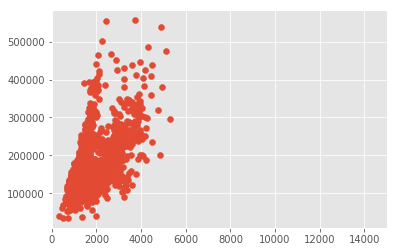

In [49]:
#look at TotalSquareFt against Price
fig = plt.figure()
sub1 = fig.add_subplot(111)
sub1.scatter(x = all_dummy.totalsq, y = all_dummy.SalePrice)
sub1.set_xlim(0, 15000)
all_data.shape


In [50]:
new_train = pd.DataFrame(all_dummy[:ntrain].copy())
new_test = all_dummy[:-ntrain].copy()
print(new_train.shape)
print(new_test.shape)
new_train.head()

(1453, 205)
(1459, 205)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtHalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,SalePrice
0,856,854,0,0,3,3,0,6,3.0,0.0,...,0,0,0,0,0,0,1,1,0,208500.0
1,1262,0,0,0,3,3,0,5,3.0,1.0,...,0,0,0,0,0,0,1,1,0,181500.0
2,920,866,0,0,3,3,0,6,3.0,0.0,...,0,0,0,0,0,0,1,1,0,223500.0
3,961,756,0,0,3,4,0,5,4.0,0.0,...,0,0,0,0,0,0,1,1,0,140000.0
4,1145,1053,0,0,4,3,0,6,3.0,0.0,...,0,0,0,0,0,0,1,1,0,250000.0


In [51]:
# from scipy import stats
# #examinig outliers by computing abs value of zscore and more than 4 sd from mean w/ TotalSq
# #add total square footage feature
# z_score = np.abs(stats.zscore(new_train[["GrLivArea", "SalePrice"]]))
# outliers = new_train[z_score >  6]
# plt.scatter(x=outliers.totalsq, y = outliers.SalePrice)
# plt.show()
# print(len(outliers))
# #there are outliers and they are from homes above 4000




In [ ]:
# #remove outliers by replace with median 
# def reject_outliers(data, m = 2.):
#     d = np.abs(data - np.median(data))
#     mdev = np.median(d)
#     s = d/mdev if mdev else 0.
#     return data[s<m]


#### View correlation matrix of features

In [52]:
num_cols = htrain._get_numeric_data()
# sns.pairplot(num_cols.dropna())
# sns.plt.show()

Create new training set with SalePrice back 

In [ ]:
#ntrain = htrain.shape[0]
#ntest = htest.shape[0]
# #y_train = htrain.SalePrice.values

# y_train1 =pd.DataFrame(y_train)
# y_train1.columns = ["SalePrice"]
# new_train = new_train.merge(y_train1, how = "inner", right_index = True, left_index = True)
# new_train.head()


In [53]:
print(new_train.SalePrice.corr(new_train.GarageCars))
print(new_train.SalePrice.corr(new_train.GarageArea))

0.6532679307166279
0.6381991638812184


In [54]:
# #drop garagearea 
new_train = pd.DataFrame(new_train)
new_train = new_train.drop("GarageArea", axis = 1)

Remove outliers from training set

Examine distribution of SalePrice

C:\Users\mjoy\Anaconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


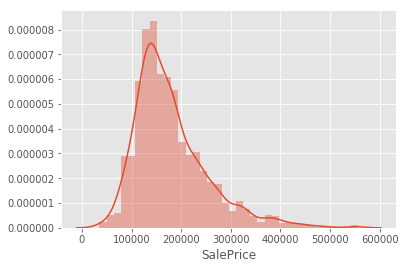

In [56]:
sns.distplot(new_train['SalePrice']);

Transform Sale Price

C:\Users\mjoy\Anaconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


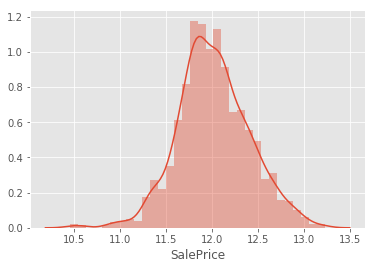

In [57]:
new_train.SalePrice = np.log1p(new_train.SalePrice)
sns.distplot(new_train['SalePrice'])


In [58]:
#standardize data
import sklearn
from sklearn.preprocessing import RobustScaler


scaler = sklearn.preprocessing.RobustScaler()
train = pd.DataFrame(scaler.fit_transform(new_train))
train.columns = list(new_train)
train.drop("SalePrice", axis =1, inplace = True)

In [59]:
Y_train = new_train.SalePrice

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, 
                                                    Y_train, train_size =.8,
                               test_size = .2, random_state = 42)


In [61]:
#randomforest classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import array



In [62]:
#run random forest regression to look at important features
model = RandomForestRegressor()
model.fit(x_train, y_train)
mod = pd.DataFrame(model.feature_importances_).T
mod.columns = list(x_train)
mod = mod.T
mod.columns = ["Importance"]
mod.sort_values("Importance",axis = 0, ascending = False, inplace = True)

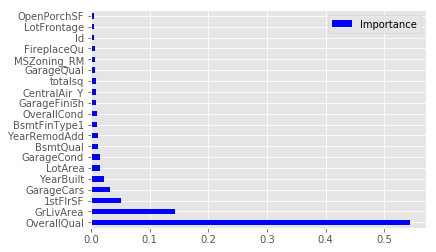

In [79]:
mod2 = mod[mod.Importance != 0].sort_values("Importance", ascending = False)
mod2.head(20).plot(kind = 'barh', color = 'b')


In [80]:
# #use non-zero important attributes to reduce features
housing_rf = train[[col for col in train if col in tuple(mod2.index)]]
housing_rf = housing_rf.assign(SalePrice = new_train['SalePrice'])

In [81]:
#new training and test set with redued features
train2, test2 = train_test_split(housing_rf, train_size =.8,
                              test_size = .2, random_state = 42)
test_y2 = test2.SalePrice
test_x2 = test2.drop('SalePrice', axis =1)
train_y2 = train2.SalePrice
train_x2 = train2.drop('SalePrice', axis =1)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge

#svreg = SVR(gamma = .0004, kernel = 'poly', C = 8, epsilon = 0.009)
bay = BayesianRidge()
elastic = ElasticNet(alpha = .0001, l1_ratio = .75, max_iter = 10000,
                    random_state = 42) 
rf = RandomForestRegressor()
lr = LinearRegression()
kernel = KernelRidge(alpha=0.6, kernel = "poly", degree =2)
ridge = Ridge(alpha = .8, solver = "auto", random_state = 42)
ridgeCV = RidgeCV(cv = 15)
gb = GradientBoostingRegressor(loss = 'huber', random_state = 42, warm_start = True)

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

models = [bay, elastic, rf, lr, ridge, ridgeCV, gb]
titles = ['bay', 'elas', 'rf', 'lr', 'ridge', 'ridgeCV', 'gb']

for i, x in zip(titles, models):
    x_mod = x.fit(train_x2, train_y2)
    x_pred = x_mod.predict(test_x2)
    rsq = x_mod.score(test_x2, test_y2)
    RMSE = np.sqrt(mean_squared_error(test_y2, x_pred))
    print(str(i) + "  RMSE: " + str(RMSE))
    print("\tR^2: "+ str(rsq) )
    print ("\tExpVar is:" + str(explained_variance_score(test_y2, x_pred)) + "\n")
    
return(x)

bay  RMSE: 0.13223918150610997
	R^2: 0.896695859366981
	ExpVar is:0.8970230317683081

elas  RMSE: 0.12991787461493065
	R^2: 0.9002907984570343
	ExpVar is:0.9005063165225302

rf  RMSE: 0.15978703915363737
	R^2: 0.8491725033375976
	ExpVar is:0.8545902340341359

lr  RMSE: 0.1273848523574879
	R^2: 0.904140976554994
	ExpVar is:0.9042133506040095

ridge  RMSE: 0.1305365280140207
	R^2: 0.8993389308871846
	ExpVar is:0.8995138702421135

ridgeCV  RMSE: 0.13223263859718937
	R^2: 0.8967060816453452
	ExpVar is:0.8970365981341158

gb  RMSE: 0.13932518915378625
	R^2: 0.8853281796026878
	ExpVar is:0.887763790439478



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_iter": np.arange(100000, 200000, 10000),
               "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                 "l1_ratio": np.arange(0.0, 1.0, 0.1)}


grid_search = GridSearchCV(elas_mod, param_grid, cv=15,scoring='neg_mean_squared_error')
grid_mod = grid_search.fit(train_x2, train_y2)
y_pred = grid_mod.predict(test_x2)


In [ ]:
# #create pipline
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.pipeline import Pipeline, make_pipeline


# class skewed(BaseEstimator, TransformerMixin):
#     def __init__(self, skew = 0.5):
#         self.skew = skew
#     def fit(self, x,y=None):
#         return self
#     def transform(self, x):
#         x_numeric = x.select_dtypes(include = [np.number])
#         skewed = x_numeric.apply(lambda x: skew(x))
#         skewed_feat = skewed[abs(skewed) >= self.skew].index
#         x[skewed_feat] = np.log(x[skewed_feat])
#         x = pd.get_dummies(x)
#         return x
        
# class lables(BaseEstimator, TransforerMixin):
#     def __init__(self)
        

In [ ]:

# from sklearn.decomposition import PCA
# from scipy.stats import skew

# pca = PCA()
# train_xpc = pca.fit_transform(x_train)
# test_xpc = pca.transform(x_test)
# import matplotlib.pyplot as plt

# pca_trafo = PCA().fit(train);

# plt.figure(figsize = (20,30));
# plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
# plt.xlabel('principal component', fontsize = 20);
# plt.ylabel('explained variance', fontsize = 20);
# plt.tick_params(axis='both', which='major', labelsize=18);
# plt.tick_params(axis='both', which='minor', labelsize=12);
# plt.xlim([0, 210]);

In [ ]:
from xgboost import XGBRegressor as xgboost

In [ ]:
#test different models
#svreg_mod = svreg.fit(train_x2, train_y2)
#ay_mod = bay.fit(train_x2, train_y2)
from sklearn.metrics import mean_squared_error

elas_pred = elas_mod.predict(test_x2)
print ('Elastic Net RMSE is: ', np.sqrt(mean_squared_error(test_y2, elas_pred)))

#rf_mod = rf.fit(train_x2, train_y2)
#lr_mod = lr.fit(train_x2, train_y2)
#kernel_mod = kernel.fit(train_x2, train_y2)
#xgb_mod = xgb.fit(train_x2, train_y2)
#ridge_mod = ridge.fit(train_x2, train_y2)
#ridgeCV_mod = ridgeCV.fit(train_x2, train_y2)
#gb_mod = gb.fit(train_x2, train_y2)


In [ ]:
coef = pd.Series(elastic.coef_, index = train_x2.columns)
print("Elastic picked " + str(sum(coef!=0)))
imp = pd.concat([coef.sort_values().head(15),
               coef.sort_values().tail(15)])
elas_imp = coef[coef != 0]
elas_imp

In [ ]:
submission_enet = pd.DataFrame()
submission_enet['Id'] = new_test2.Id
Y_train = new_train2['SalePrice']
elastic.fit(new_train2, Y_train)
sub_pred = elastic.predict(new_test2)

In [ ]:
final_predict_enet = np.exp(sub_pred)
print ("Original predictions are: \n", sub_pred[:5], "\n")
print ("Final predictions are: \n", final_predict_enet[:5])
submission_enet['SalePrice'] = sub_pred
submission_enet.drop("Id", axis =1, inplace = True)

In [ ]:
print(new_train.shape)
print(Y_train.shape)
print(new_test.shape)

In [ ]:
submission_enet.to_csv("MarissaJSubmission.csv")

In [ ]:
submission_enet

In [ ]:
#predict on different models
#lass_pred = lass_mod.predict(test_x2)
#svreg_pred = svreg_mod.predict(test_x2)
#bay_pred = bay_mod.predict(test_x2)
#elas_pred = elas_mod.predict(test_x2)
#rf_pred = rf_mod.predict(test_x2)
#lr_pred = lr_mod.predict(test_x2)
#kernel_pred = kernel_mod.predict(test_x2)
#xgb_pred = xgb_mod.predict(test_x2)
#ridge_pred = ridge_mod.predict(test_x2)
#ridgeCV_pred = ridgeCV_mod.predict(test_x2)
#gb_pred = gb_mod.predict(test_x2)


In [ ]:

# print ("Bayesian R^2 is: \n", bay_mod.score(test_x2, test_y2))
# print ("Elastic R^2 is: \n", elas_mod.score(test_x2, test_y2))
# #print ("RF R^2 is: \n", rf_mod.score(test_x2, test_y2))
# #print ("Linear R^2 is: \n", lr_mod.score(test_x2, test_y2))
# #print ("Kernel R^2 is: \n", kernel_mod.score(test_x2, test_y2))
# print ("Ridge R^2 is: \n", ridge_mod.score(test_x2, test_y2))
# print ("RidgeCV R^2 is: \n", ridgeCV_mod.score(test_x2, test_y2))


In [ ]:
# from sklearn.metrics import mean_squared_error

# #print ('SVR RMSE is: ', np.sqrt(mean_squared_error(test_y2, svreg_pred)))
# #print ('Bayesian RMSE is: ', np.sqrt(mean_squared_error(test_y2, bay_pred)))
# print ('Elastic Net RMSE is: ', np.sqrt(mean_squared_error(test_y2, elas_pred)))
# #print ('Random Forest RMSE is: ', np.sqrt(mean_squared_error(test_y2, rf_pred)))
# #print ('Kernel RMSE is: ', np.sqrt(mean_squared_error(test_y2, kernel_pred)))
# #print ('Ridge RMSE is: ', np.sqrt(mean_squared_error(test_y2, ridge_pred)))
# #print ('RidgeCV RMSE is: ', np.sqrt(mean_squared_error(test_y2, ridgeCV_pred)))
# #print ('GB RMSE is: ', np.sqrt(mean_squared_error(test_y2, gb_pred)))


In [ ]:
# from sklearn.metrics import explained_variance_score

# #print ("Bayesian ExpVar is: \n", explained_variance_score(test_y2, bay_pred))
# print ("Elastic ExpVar is: \n", explained_variance_score(test_y2, elas_pred))
# #print ("RF ExpVar is: \n", explained_variance_score(test_y2, rf_pred))
# #print ("Kernel R^2 is: \n", kernel_mod.score(test_x2, test_y2))
# #print ("Ridge ExpVar is: \n", explained_variance_score(test_y2, ridge_pred))
# #print ("RidgeCV ExpVar is: \n", explained_variance_score(test_y2, ridgecv_pred))
# #print ("GB ExpVar is: \n", explained_variance_score(test_y2, gb_pred))


In [ ]:
# from sklearn.feature_selection import SelectFromModel

# sfm = SelectFromModel(elas_mod, threshold = .2)
# sfm.fit(train_x2, train_y2)

In [ ]:
# from sklearn.feature_selection import RFECV

# selector = RFECV(elas_mod, cv = 15)
# selector.fit(train_x2, train_y2)


In [ ]:
# # housing_rf.T.join(feature_df, feature_df, left_on= housing_rf.index,
# #          right_on = 'features')
# #housing_rf.set_index(housing_rf.columns).join(feature_df.T.set_index('features'))
# train3, test3 = train_test_split(housingb, train_size =.8,
#                               test_size = .2, random_state = 42)
# test_y3 = test3.SalePrice
# test_x3 = test3.drop('SalePrice', axis =1)
# train_y3 = train3.SalePrice
# train_x3 = train3.drop('SalePrice', axis =1)

# from sklearn.linear_model import LinearRegression, ElasticNetCV
# new = LinearRegression()
# new_mod = new.fit(train_x3, train_y3)
# new_pred = new_mod.predict(test_x3)
# print("RMSE Lin: ", np.sqrt(mean_squared_error(test_y3, new_pred)))


# lass2= ElasticNetCV()
# lass2_mod = lass2.fit(train_x3, train_y3)
# lass2_pred = lass2_mod.predict(test_x3)
# print("RMSE lass: ", np.sqrt(mean_squared_error(test_y3, lass2_pred)))


In [ ]:
# from sklearn.linear_model import BayesianRidge

# br = BayesianRidge()
# br_mod = br.fit



In [ ]:


# elas_mod = elastic.fit(train_x2, train_y2)
# elas_pred = elas_mod.predict(test_x2)
# print ('Elastic Net RMSE is: ', np.sqrt(mean_squared_error(test_y2, elas_pred)))


In [ ]:
# from sklearn.feature_selection import SelectFromModel
# sfm  = SelectFromModel(model, threshold = .3)
# sfm.fit(train_x, train_y)

In [ ]:
# x_imptrain = sfm.transform(train_x)
# #x_imptest = sfm.transform(test_x, )
# #x_imptrain
# n_features = x_imptrain.shape[1]
# while n_features > 2:
#     sfm.threshold += 0.1
#     x_imptrain = sfm.transform(train_x)
#     n_features = X_transform.shape[1]

In [ ]:
# x_imptrain

In [ ]:
# rf_imp = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# rf_imp.fit(x_imptrain, train_y)

In [ ]:
# rf2pred = rf_imp.predict(test_x)
# accuracy_score(test_y, rf2pred)

In [ ]:
# rf2 = RandomForest(SalePrice ~ Neighborhood_Blueste SalePrice + Exterior1st_ImStucc SalePrice + MiscFeature_TenC SalePrice + Condition1_RRNe SalePrice + SaleType_Oth SalePrice + Exterior1st_AsphShn SalePrice + Exterior1st_CBlock SalePrice + Exterior2nd_Other SalePrice + Exterior2nd_CBlock SalePrice + SaleType_Con SalePrice + SalePrice^2 + Exterior2nd_Stone SalePrice + RoofStyle_Shed SalePrice + Heating_OthW SalePrice + MiscFeature_Othr SalePrice + Exterior1st_BrkComm SalePrice + Exterior2nd_AsphShn SalePrice + PavedDrive SalePrice + SaleType_CWD SalePrice + Exterior1st_Stone SalePrice + Electrical SalePrice + Foundation_Wood SalePrice + SaleType_ConLI SalePrice + Alley_None SalePrice + CentralAir_Y SalePrice + LotConfig_FR3 SalePrice + Neighborhood_NPkVill SalePrice + SaleCondition_Alloca SalePrice + Heating_Wall SalePrice + RoofStyle_Mansard SalePrice + SaleType_ConLw SalePrice + ScreenPorch SalePrice + HouseStyle_2.5Fin SalePrice + LotConfig_CulDSac SalePrice + SaleCondition_AdjLand SalePrice + MasVnrType_Stone SalePrice + Heating_GasA SalePrice + GarageCond SalePrice + HouseStyle_2.5Unf SalePrice + Heating_GasW SalePrice + Foundation_Stone SalePrice + Neighborhood_NoRidge SalePrice + SaleType_ConLD SalePrice + Neighborhood_StoneBr SalePrice + BldgType_Duplex SalePrice + MiscFeature_None SalePrice + BsmtFinType2_BLQ SalePrice + Neighborhood_Veenker SalePrice + RoofStyle_Gambrel SalePrice + Neighborhood_MeadowV SalePrice + Functional SalePrice + Neighborhood_CollgCr SalePrice + Condition1_RRNn SalePrice + SaleCondition_Family SalePrice + Neighborhood_Sawyer SalePrice + BldgType_Twnhs SalePrice + HouseStyle_1.5Unf SalePrice + Neighborhood_IDOTRR SalePrice + Exterior2nd_Brk Cmn SalePrice + Condition1_PosA SalePrice)

In [ ]:
# scores = cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=50)
# 

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]

# search = GridSearchCV(model, param_grid, cv=10, scoring = "neg_mean_squared_error")
# search.fit(train_x, train_y)

In [ ]:
# #cros validated 
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=50)
# rmse_cv = np.sqrt(-scores)
# print("Scores", scores)
# print("RMSE Mean", rmse_cv.mean())
# print("RMSE SD:", rmse_cv.std())

In [ ]:
# #new set with variables <= 0 removed
# mod2 = mod[mod.Importance <= 0]
# drops = list(mod2.index)
# housing = housing_stand.drop(drops, axis = 1)

# #x_housing2 = x_housing.drop(housing[])
# train2, test2 = train_test_split(housing, train_size =.8,
#                               test_size = .2, random_state = 42)
# test_y2 = test2.SalePrice
# test_x2 = test2.drop('SalePrice', axis =1)
# train_y2 = train2.SalePrice
# train_x2 = train2.drop('SalePrice', axis =1)

In [ ]:
# from boruta import BorutaPy

# features = BorutaPy(model, n_estimators = 'auto', random_state = 42)
# features.fit(train_x2.values, train_y2.values)
# filtered = (features.transform(train_x2.values)).T

In [ ]:
# feature_df = pd.DataFrame(train_x2.columns.tolist(), columns=['features'])
# feature_df['rank']=features.ranking_
# feature_df = feature_df.sort_values('rank', ascending = True).reset_index(drop = True)
# # (feature_df.head(boruta_selector.n_features_
# # features.n_features_
# feature_df.head(20)

In [ ]:
# features.names_

In [ ]:
# train_x2.columns.tolist()